<a href="https://colab.research.google.com/github/Omayma10/Test_ResNet-50/blob/main/essai_restnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Installer librairies

In [31]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Importer une image du Drive et l'afficher


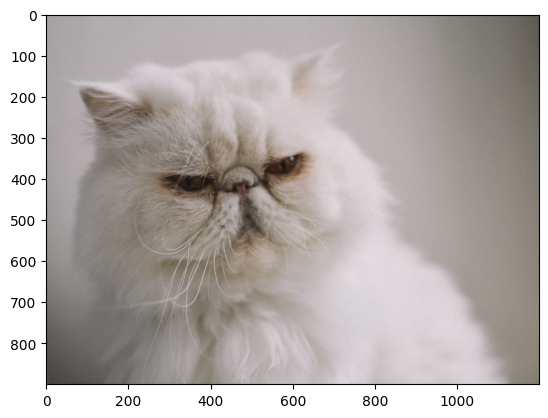

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

InputImg = Image.open("/content/drive/MyDrive/cat2.jpg")

import matplotlib.pyplot as plt
plt.imshow(InputImg)

3. Preprocessing de l'image dans le cas de ResNet-50

In [33]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [34]:
Transformed_InputImg = transform(InputImg)

In [35]:
print(Transformed_InputImg.shape)

torch.Size([3, 224, 224])


4. Convertir l'image pour être dans le format 'batch'

In [36]:
import torch
InputImg_Batched = torch.unsqueeze(Transformed_InputImg, 0) 

In [37]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


5. Voir les modèles proposés par torchvision

In [38]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [39]:
resnet = models.resnet50(pretrained = True)

# On active le mode 'eval' afin de pouvoir donner une image et d'en déduire la prédiction
resnet.eval()

# On donne l'image du début à notre modèle

output = resnet(InputImg_Batched)

6. Lire la liste des classes associées au modèle ResNet-50 pré-entraîné

In [40]:
with open('/content/drive/MyDrive/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()] 

7. Prédire la classe associée à l'image

In [41]:
_, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

283: 'Persian cat', 99.96924591064453
